**Lab 6 - Agglomerative clustering and K-Means analyses**

In [1]:
# Import of used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1

In [43]:
from sklearn.datasets import make_blobs

# Import of dataset - simulated one
# X -> features, y -> cluster number
X, y = make_blobs(n_samples=100,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  shuffle=True, random_state=1)

## (a) - agglomerative cluster analysis with 2 features

With 2 features, the dendogram shows that $K=2$ is the best number of clusters to use, with *make_blobs* we specified 5 centers, that means that the dendogram is not working really well for only 2 features having 100 samples.

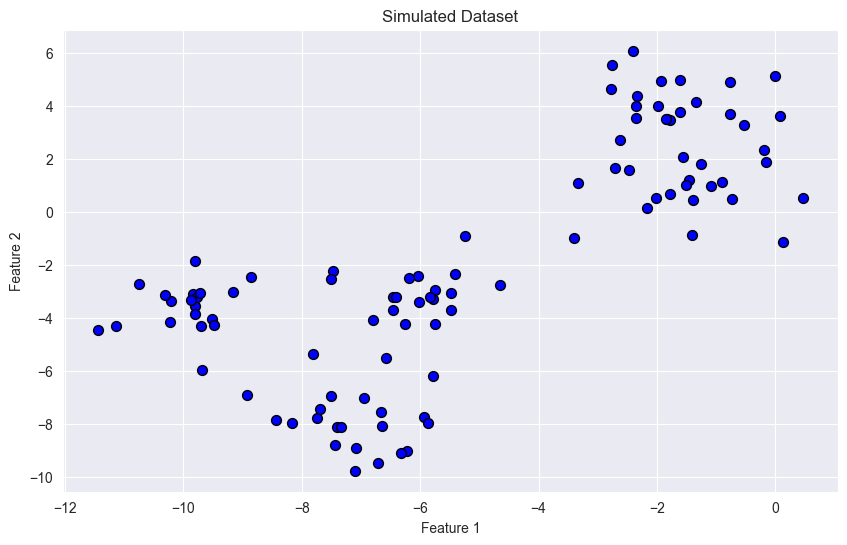

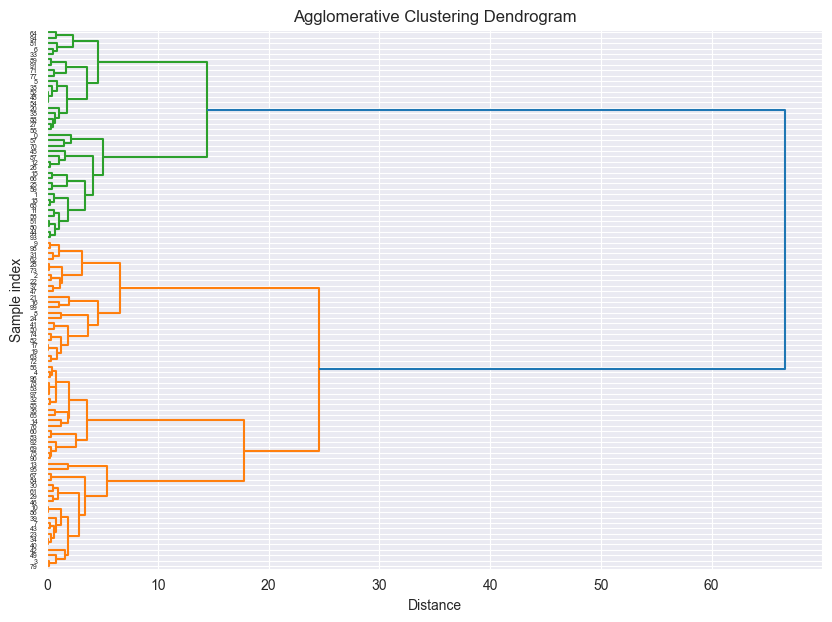

In [44]:
from scipy.cluster.hierarchy import linkage, dendrogram

# (a) - Agglomerate cluster analysis
# Current dataset visualization
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='black', s=50)
plt.title('Simulated Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Agglomerative Clustering
# Using the 'ward' linkage method to minimize the variance of clusters being merged.
linked = linkage(X, 'ward')

# Plotting the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='right', distance_sort='descending', show_leaf_counts=True)
plt.title('Agglomerative Clustering Dendrogram')
plt.ylabel('Sample index')
plt.xlabel('Distance')
plt.show()


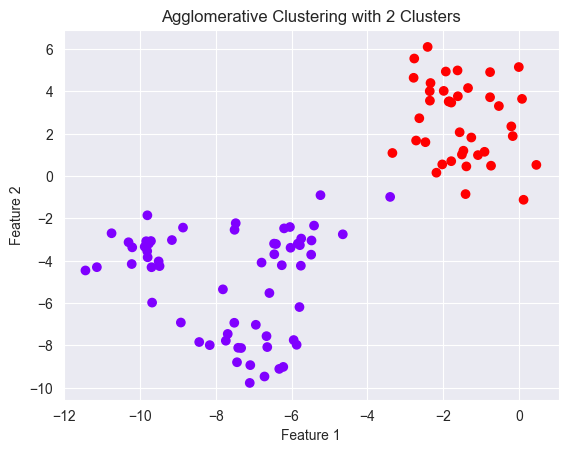

In [56]:
from sklearn.cluster import AgglomerativeClustering

# Visualize the clusters with the selected K

n_clusters = 2  # Adjust based on dendrogram
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
agg_clustering.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=agg_clustering.labels_, cmap='rainbow')
plt.title(f'Agglomerative Clustering with {n_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## (b) - Increase number of features to 10

With $10$ features, the dendogram suggests $K = 5$ which is the number of centers we chose in the *make_blobs*. This shows how not having enough information can hinder the dendogram.

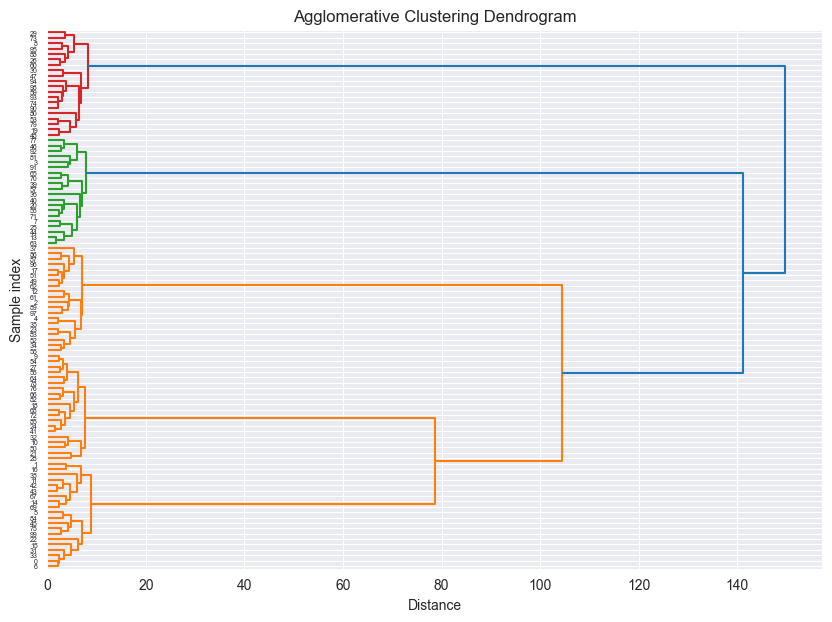

In [48]:
X_10, y_10 = make_blobs(n_samples=100,
                  n_features=10,
                  centers=5,
                  cluster_std=1,
                  shuffle=True, random_state=1)

linked = linkage(X_10, 'ward')

# Plotting the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='right', distance_sort='descending', show_leaf_counts=True)
plt.title('Agglomerative Clustering Dendrogram')
plt.ylabel('Sample index')
plt.xlabel('Distance')
plt.show()

## (c) Conclusion

We need enough information to use the dendogram effectively with 10 features, with 2 is not very effective.

## (d) Scatter plot for both datasets

As expected, the hierarchical clustering with the 2-feature dataset performed poorly, the clustering with the 10-features dataset performed really well.

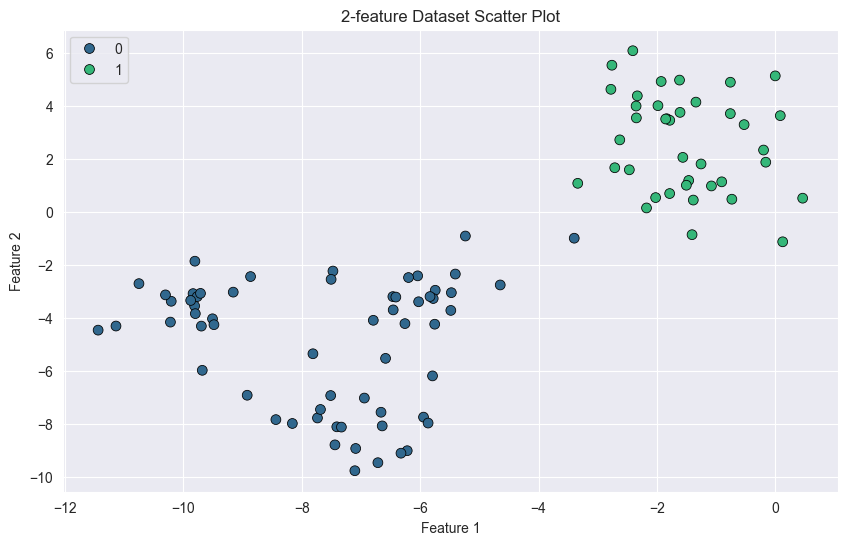

Total variability captured by PCA: 71.42%


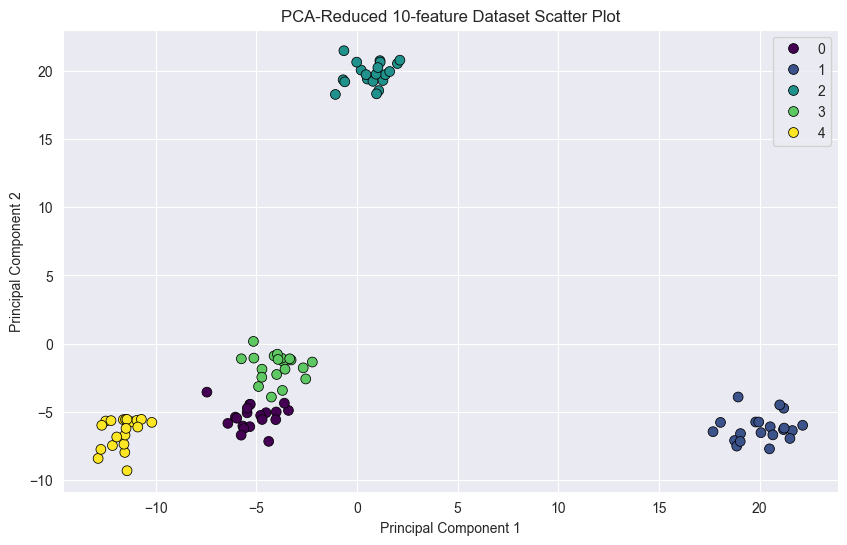

In [58]:
from sklearn.decomposition import PCA

n_clusters_10 = 5
agg_clustering_10 = AgglomerativeClustering(n_clusters=n_clusters_10, linkage='ward')
agg_clustering_10.fit(X_10)

# Visualize the 2-feature dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=agg_clustering.labels_, palette='viridis', s=50, edgecolor='k')
plt.title('2-feature Dataset Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# PCA Reduction for the 10-feature dataset
pca = PCA(n_components=2) # Reduce to 2 components
X_10_reduced = pca.fit_transform(X_10)
print(f"Total variability captured by PCA: {np.sum(pca.explained_variance_ratio_)*100:.2f}%")

# Visualize the PCA-reduced 10-feature dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_10_reduced[:, 0], y=X_10_reduced[:, 1], hue=agg_clustering_10.labels_, palette='viridis', s=50, edgecolor='k')
plt.title('PCA-Reduced 10-feature Dataset Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Part 2 - K-Means

## (a) - How many clusters would you recommend when there are 2 features?

Using K-Means and plotting Elbow and Silhouette, we can deduct to use 4-5 Cluster, way better than what we got before using the other method

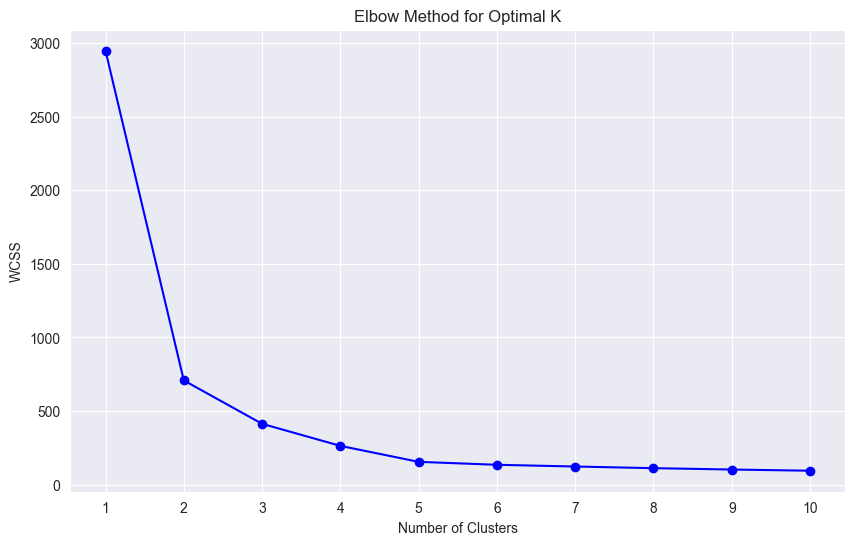

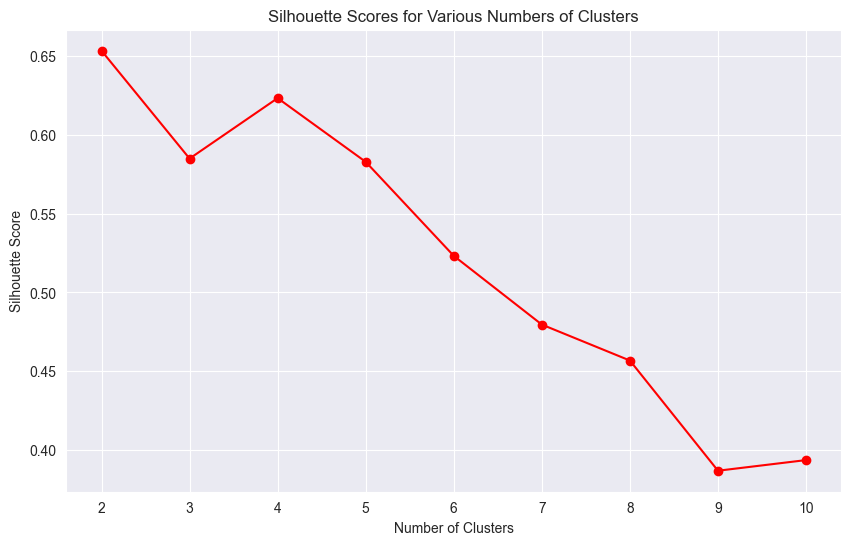

In [55]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

wcss = []
silhouette_coefficients = []
for i in range(1, 11): # Test up to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # WCSS for each K
    # Calculate silhouette scores for each K, except when K=1
    if i > 1:
        score = silhouette_score(X, kmeans.labels_)
        silhouette_coefficients.append(score)

# Step 3: Plot the Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_coefficients, marker='o', linestyle='-', color='red')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)

## (b) - How many clusters would you recommend when there are 10 features?

With 10 features is obvious how to read the two plots, 5 clusters is the correct one to select

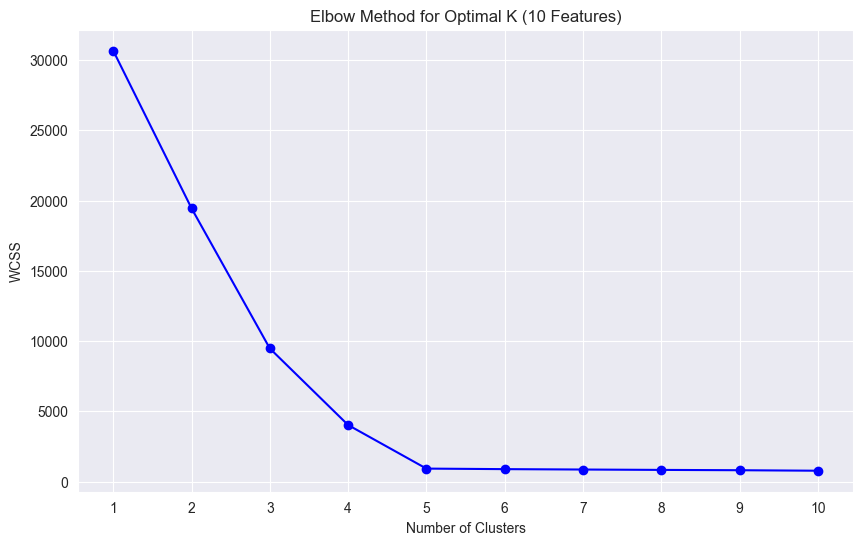

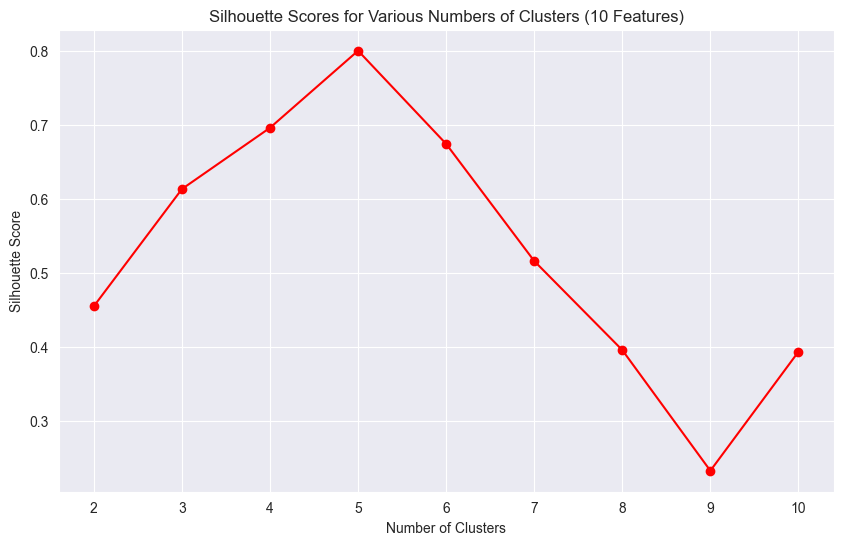

In [59]:
# Apply K-means and calculate WCSS for the 10-feature dataset
wcss_10 = []
silhouette_coefficients_10 = []
for i in range(1, 11): # Test up to 10 clusters
    kmeans_10 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=1)
    kmeans_10.fit(X_10)
    wcss_10.append(kmeans_10.inertia_)  # WCSS for each K
    # Calculate silhouette scores for each K, except when K=1
    if i > 1:
        score = silhouette_score(X_10, kmeans_10.labels_)
        silhouette_coefficients_10.append(score)

# Plot the Elbow Plot for the 10-feature dataset
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_10, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal K (10 Features)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Silhouette
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_coefficients_10, marker='o', linestyle='-', color='red')
plt.title('Silhouette Scores for Various Numbers of Clusters (10 Features)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


## (d) Plot cluster results in scatter plot

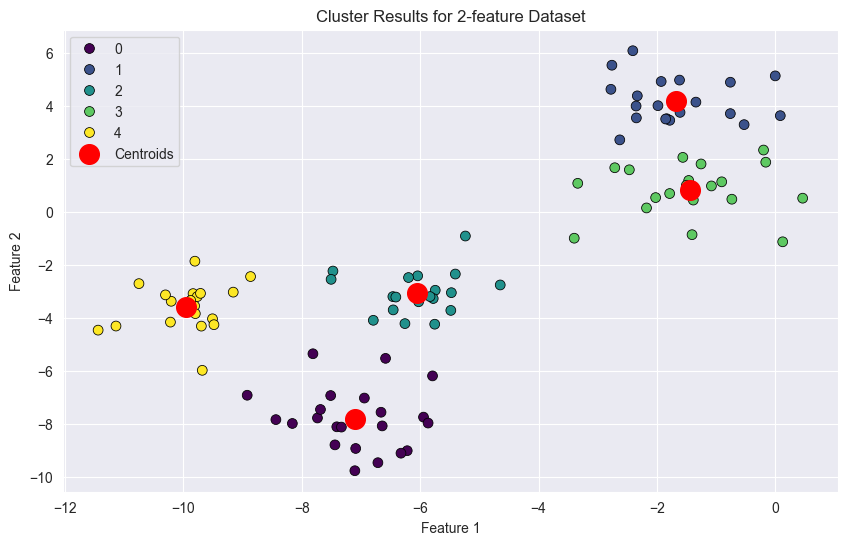

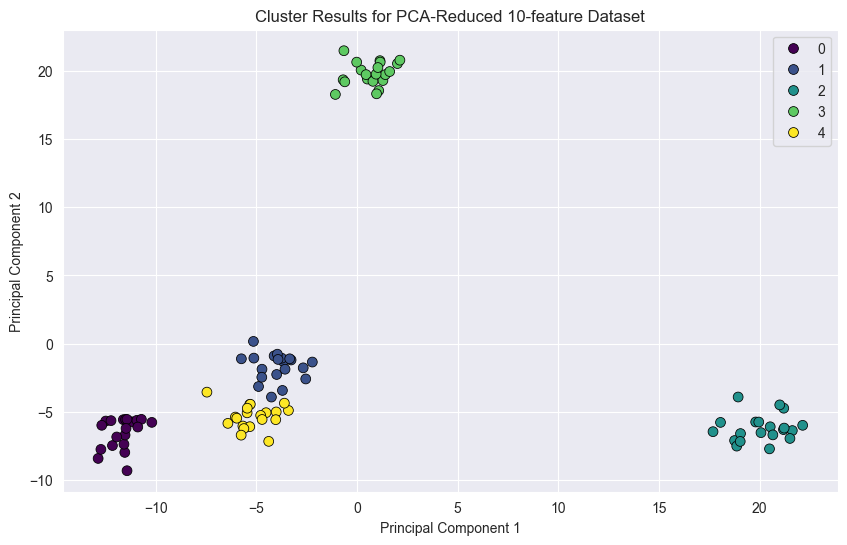

In [60]:
# Apply K-means to the 2-feature dataset with 5 clusters
kmeans_2 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans_2 = kmeans_2.fit_predict(X)

# Plot for the 2-feature dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans_2, palette='viridis', s=50, edgecolor='k', legend='full')
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('Cluster Results for 2-feature Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Apply K-means to the 10-feature dataset with 5 clusters
kmeans_10 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=1)
y_kmeans_10 = kmeans_10.fit_predict(X_10)

# PCA Reduction for visualization
pca_10 = PCA(n_components=2)
X_10_reduced = pca_10.fit_transform(X_10)

# Plot for the PCA-reduced 10-feature dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_10_reduced[:, 0], y=X_10_reduced[:, 1], hue=y_kmeans_10, palette='viridis', s=50, edgecolor='k', legend='full')
plt.title('Cluster Results for PCA-Reduced 10-feature Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
